In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut


%matplotlib inline

In [2]:
#Load data
names=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
       'total sulfur dioxide','density','pH','sulphates','alcohol','quality']
df = pd.read_csv("winequality-red.csv", sep=';',names=names)

In [3]:
#Extract x
X_df = df.iloc[:,:-1]
X = X_df.as_matrix()

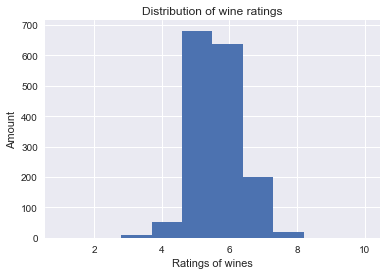

In [4]:
y_df = df['quality'].values
plt.hist(y_df, range=(1, 10))
plt.xlabel('Ratings of wines')
plt.ylabel('Amount')
plt.title('Distribution of wine ratings')
plt.show()

In [5]:
#make y value binary, threshold=7
Y = np.array([1 if i>=7 else 0 for i in y_df])

In [6]:
#Split set into test and train
X_test=[]
X_train=[]
Y_test=[]
Y_train=[]

X_test=[X[i] for i in range(int(0.2*len(X)))]
X_train=[X[i] for i in range(int(0.2*len(X)),len(X))]
Y_test=[Y[i] for i in range(int(0.2*len(Y)))]
Y_train=[Y[i] for i in range(int(0.2*len(Y)),len(Y))]

In [ ]:
loo=LeaveOneOut()
loo.get_n_splits(Y_train)
cv_scores=[]


for num_trees in range(1,21):
    model = RandomForestClassifier(n_estimators = num_trees)
    scores=cross_val_score(model, X_train, Y_train, cv=loo,scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1 - x for x in cv_scores]

print ("index          Score          MSE")
for i in range(len(cv_scores)):
    print '%d          %.5f          %.5f'% (i, cv_scores[i],MSE[i])
    

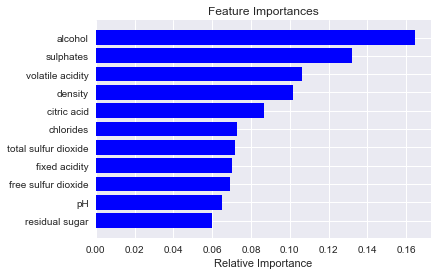

In [51]:
#feature selection
model=RandomForestClassifier(n_estimators=12)
model.fit(X_train,Y_train)

features = df.columns[0:12]
importances = model.feature_importances_
indices = np.argsort(importances)
 
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')


In [47]:
print df.columns
new_features=[df.columns[[0,1,2,3,4,5,6,7,8,9,10,11]],df.columns[[0,1,2,3,4,6,7,8,9,10,11]],df.columns[[0,1,2,4,6,7,8,9,10,11]],
              df.columns[[1,2,4,6,7,8,9,10,11]],df.columns[[1,2,4,6,7,9,10]]]
for features in new_features:
    X_df1 = df[features]
    X1 = X_df1.as_matrix()
    y_df1 = df['quality'].values
    Y1 = np.array([1 if i>=7 else 0 for i in y_df1])
    #Split set into test and train
    X_test1=[]
    X_train1=[]
    Y_test1=[]
    Y_train1=[]

    X_test1=[X[i] for i in range(int(0.2*len(X1)))]
    X_train1=[X[i] for i in range(int(0.2*len(X1)),len(X1))]
    Y_test1=[Y[i] for i in range(int(0.2*len(Y1)))]
    Y_train1=[Y[i] for i in range(int(0.2*len(Y1)),len(Y1))]
    
    model_test=RandomForestClassifier(n_estimators=12)
    model_test.fit(X_train1,Y_train1)
    scores=[]
    scores.append(model_test.score(X_test1, Y_test1))
    print('\nThe accuracy of OUR classifier is %d%%' % (float(scores[0])*100))

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

The accuracy of OUR classifier is 93%

The accuracy of OUR classifier is 92%

The accuracy of OUR classifier is 94%

The accuracy of OUR classifier is 93%

The accuracy of OUR classifier is 93%
